<span style="color:red">**Team members / emails**</span> --> *Credit Card Fraud Detection*
- (1) MELLAL Houdaifa / hodaifa.mellal@gmail.com

#Configuration avec le compte google pour recupèrer les fichiers a partir du drive:

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1SWSwXFjyk8Nxv6KJKw7HW6bX5y4mYR4z"})   # The id of the file ratings file
downloaded.GetContentFile('creditcard.csv')        # The name of the file

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
  
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#1. Préparation des données (creditcard):

Lecture du fichier creditcard et affichage des 10 premières lignes:

In [ ]:
file = tf.keras.utils
raw_df = pd.read_csv('creditcard.csv')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Affichage des informations de chaque colonnes du dataset avec le type et les element nulles; on peux remarquer que notre data ne contiens aucun element null.

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Description plus détaillé des variables avec plus d'information chacune:

In [ ]:
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Affichage de la matrice de corréaltion, on peux remarquer que les variables sont pas vraiment corrélés entre elles.

In [ ]:
# Correlation matrix between the different features:
raw_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

Calcule des nombre des classes de fraude et de non fraude, et l'affichage et le sauvgarde des résultats:

In [ ]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive (Fraude Cases): {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive (Fraude Cases): 492 (0.17% of total)



Transformation des données : 
Premièrement la classe Amount est très large, donc on utilise la fonction log pour la diminuer

In [ ]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)
cleaned_df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Ammount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,1.300464
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,1.607636
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,3.708707
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,4.534758
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,1.303184


Découpage du dataset en trainset, valtest et testset:

In [ ]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features (Y for each set):
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

# X data for each set :
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

Application de la normalisation pour accelérer la covergence et éviter les local minimum.

In [ ]:
from sklearn import preprocessing

train_features = preprocessing.normalize(train_features)
val_features = preprocessing.normalize(val_features)
test_features = preprocessing.normalize(test_features)


Après la normalisation, on peux voir que les valeurs sont maintenants inclus entre -1 et 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


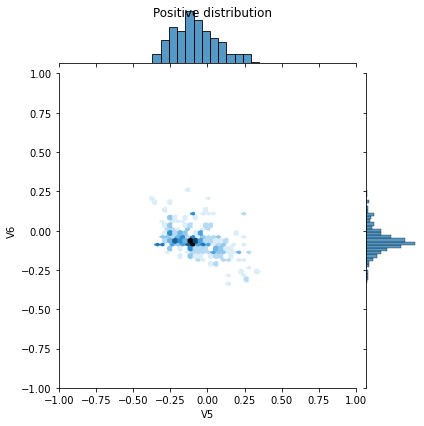

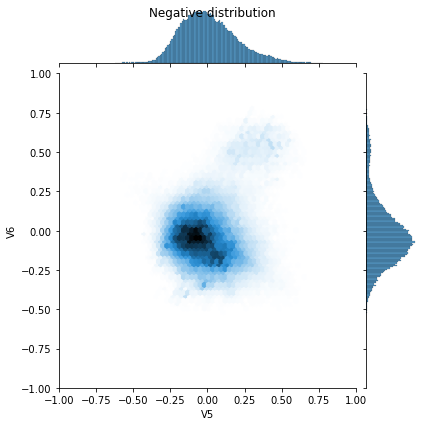

In [ ]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'],
              kind='hex', xlim=(-1,1), ylim=(-1,1))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V5'], neg_df['V6'],
              kind='hex', xlim=(-1,1), ylim=(-1,1))
_ = plt.suptitle("Negative distribution")

#2. Entrainement simple

Définir les métrics utilisé, et la constructions des modèles baseline ( avec une seule couche ) et le modèle elaboré avec multiples couches:

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model_baseline(metrics=METRICS, output_bias=None):
  seed(100)
  tf.random.set_seed(100)
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

def make_model_elab(metrics=METRICS, output_bias=None):
  seed(100)
  tf.random.set_seed(100)
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  
  model = keras.Sequential([
    keras.layers.Dense(units=20, input_shape=(train_features.shape[-1],), activation='relu'),
    keras.layers.Dense(units=24,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=20,activation='relu'),
    keras.layers.Dense(units=24,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

Calcule du bais initial avec la formule préciser en cours, definir les époches et le batch_size également, et finalement définir les conditions d'arrets:

In [ ]:
#Calculate the initial_bias : 
initial_bias = np.log([pos/neg])

#Intialize the parameters of our model:
EPOCHS = 300
BATCH_SIZE = 2048

#Define the 
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=50,
    mode='max',
    restore_best_weights=False)

#Create the model baseline with the initial bias: 
model_baseline = make_model_baseline(initial_bias)
print('The summary of baseline model:')
model_baseline.summary()

#Create the elaborated model with the initial bias:
model_elab = make_model_elab(initial_bias)
print('The summary of the elaborated model:')
model_elab.summary()

The summary of baseline model:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________
The summary of the elaborated model:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                600       
_________________________________________________________________
dense_3 (Dense)              (None

Sauvgarder les poids pour pouvoir les utiliser a chaque modification ou construction d'un nouveau modèle:

In [ ]:
#Save the initial weights of the baseline model:

model_baseline.save_weights('initial_weights')

model_elab.save_weights('initial_weights_elab')

définir les fonction d'entrainement du modèle baseline et elaboré:

In [ ]:
#Function that trian the two models:

#Train the baseline model with the initial weights:
def train_model_baseline(trainData,trainLabels):
  model_baseline  = make_model_baseline()
  model_baseline.load_weights('initial_weights')
  baseline_history = model_baseline.fit(
      trainData,
      trainLabels,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[early_stopping],
      validation_data=(val_features, val_labels))
  return model_baseline
  
#Train the baseline model with the initial weights:
def train_model_elab(trainData,trainLabels):
  model_elab  = make_model_elab()
  model_elab.load_weights('initial_weights_elab')
  elab_history = model_elab.fit(
      trainData,
      trainLabels,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[early_stopping],
      validation_data=(val_features, val_labels))
  return model_elab

entrainement du modèle baseline:

In [ ]:
#Train the baseline model with the initial weights:
model_baseline  = train_model_baseline(train_features,train_labels)

Epoch 1/300
90/90 [==============================] - 4s 24ms/step - loss: 0.2054 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 93977.1099 - fn: 163.4615 - accuracy: 0.9983 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4331 - val_loss: 0.1288 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45502.0000 - val_fn: 67.0000 - val_accuracy: 0.9985 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6860
Epoch 2/300
90/90 [==============================] - 1s 14ms/step - loss: 0.1205 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 93968.4066 - fn: 172.1648 - accuracy: 0.9981 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6457 - val_loss: 0.0719 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45502.0000 - val_fn: 67.0000 - val_accuracy: 0.9985 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8934
Epoch 3/300
90/90 [==============================] - 1s 11ms/step - loss: 0.0737 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 93971.1648 - fn: 169.4066 - accuracy: 0.9

entrainement du modèle elaboré:

In [ ]:
#Train the baseline model with the initial weights:
model_elab  = train_model_elab(train_features,train_labels)

Epoch 1/300
90/90 [==============================] - 4s 24ms/step - loss: 0.5061 - tp: 53.8681 - fp: 2372.6923 - tn: 137106.4176 - fn: 176.5934 - accuracy: 0.9788 - precision: 0.0224 - recall: 0.2940 - auc: 0.7338 - val_loss: 0.0127 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45502.0000 - val_fn: 67.0000 - val_accuracy: 0.9985 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9006
Epoch 2/300
90/90 [==============================] - 1s 13ms/step - loss: 0.0153 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 93968.4066 - fn: 172.1648 - accuracy: 0.9981 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7650 - val_loss: 0.0069 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45502.0000 - val_fn: 67.0000 - val_accuracy: 0.9985 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8708
Epoch 3/300
90/90 [==============================] - 1s 13ms/step - loss: 0.0092 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 93971.1648 - fn: 169.4066 - accuracy: 0.9982 - preci

la fonction responsable d'affichage des metrics:

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

les fonctions responsable de l'affichage et de plot des metrics et matrice de confusion:

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [ ]:
def meterics(model,test_features=test_features,test_labels=test_labels,BATCH_SIZE=BATCH_SIZE):
  
  test_predictions= model.predict(test_features, batch_size=BATCH_SIZE)
  results = model.evaluate(test_features, test_labels,
                                            batch_size=BATCH_SIZE, verbose=0)
  mtr = {}
  for name, value in zip(model.metrics_names, results):
    mtr[name]=value
    print(name, ': ', value)
  print()

  plot_cm(test_labels, test_predictions)
  return mtr

affichage des résultat pour le modèle baseline :

loss :  0.003959333524107933
tp :  70.0
fp :  12.0
tn :  56852.0
fn :  28.0
accuracy :  0.9992977976799011
precision :  0.8536585569381714
recall :  0.7142857313156128
auc :  0.9175288081169128

Legitimate Transactions Detected (True Negatives):  56852
Legitimate Transactions Incorrectly Detected (False Positives):  12
Fraudulent Transactions Missed (False Negatives):  28
Fraudulent Transactions Detected (True Positives):  70
Total Fraudulent Transactions:  98


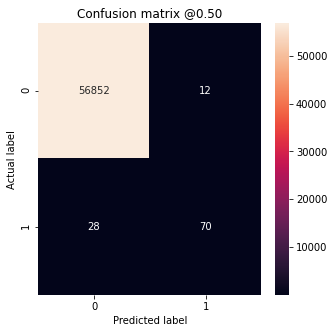

In [ ]:
metrics_simple_baseline=meterics(model_baseline)

affichage des résultat pour le modèle elaboré:

loss :  0.005331089720129967
tp :  76.0
fp :  14.0
tn :  56850.0
fn :  22.0
accuracy :  0.9993680119514465
precision :  0.8444444537162781
recall :  0.7755101919174194
auc :  0.9124574065208435

Legitimate Transactions Detected (True Negatives):  56850
Legitimate Transactions Incorrectly Detected (False Positives):  14
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  98


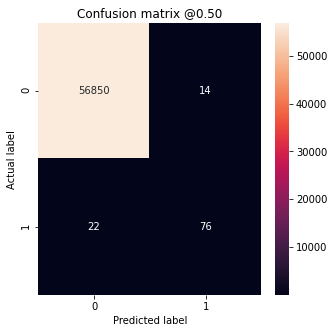

In [ ]:
metrics_simple_elab=meterics(model_elab)

Le modèle baseline sur les données des cartes crédits sans modification sur le partitionnement des classes, et sans calculer le poids de chaque classe donne un résultat acceptable, d'où sur 90 opérations de fraudes, il détecte 68. mais, il prédit 18 opérations comme un fraude, alors qu'en vrai ce n'est pas le cas. Par contre, le modèle élaboré est plus performant en terme de détection des fraudes, ou il détecte 76 opérations sur 90, mais il classe 28 opérations qui n'est pas censée être frauduleuse, comme une opération de fraude.

Dans le domaine des banques, il est préférable d'annoncer qu'une opération est frauduleuse alors qu'elle n'est pas, que de ne pas détecter une opération de fraude, donc, en terme des résultats et des cas d'usage, le modèle élaboré semble avoir des meilleurs résultats, et une meilleure performance. Surtout, car le nombre des opérations détectées frauduleusement alors qu'elles ne le sont pas est négligeable.



#3. Entrainement avec pondération des classes:

Calcule des poids pour les deux classes:

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

#Define a dictionary with the weight of each class:
class_weight = {0: weight_for_0, 1: weight_for_1}

NameError: ignored

entrainement du modèle baseline en précisant les poids:

In [ ]:
#Train the baseline model with the initial weights and class weight:
model_baseline_weighted  = make_model_baseline()
model_baseline_weighted.load_weights('initial_weights')
baseline_history_weighted = model_baseline_weighted.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    class_weight=class_weight)

entrainement du modèle elaboré en précisant les poids:

In [ ]:
#Train the elaborated model with the initial weights and class weight:
model_elab_weighted  = make_model_elab()
model_elab_weighted.load_weights('initial_weights_elab')
elab_history_weighted = model_elab_weighted.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    class_weight=class_weight)

affichage des résultats pour le modèle baseline avec pondération des classes:

In [ ]:
metrics_weighted_baseline=meterics(model_baseline_weighted)

affichage des résultats pour le modèle elaboré avec pondération des classes:

In [ ]:
metrics_weighted_elab=meterics(model_elab_weighted)

En appuyant sur les poids des classes, ou on a calculé les poids de chaque classes afin de donner priorité à la classe minoritaire dans l'entraînement, on a eu une meilleure performance dans la détection des fraudes, par contre, beaucoup plus des opérations qui sont détecté comme fraude, alors qu'ils ne le sont pas.


Les deux modèles détectent le même nombre des opérations de fraude, ou c'est 82 opérations sur 90. Par contre, on peut voir que le modèle élaboré est largement mieux avec l'approche des poids, car il se trompe dans moins des classes pour les opérations qui ne sont pas des fraudes. ( 617 opérations pour le modèle élaboré contre 1279 pour le baseline )




#4. Entrainement avec oversampling

Utiliser l'approche Random d'oversampling avec le package imblearn:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.5)

train_features_over, train_labels_over = oversample.fit_resample(train_features, train_labels)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


entrainement des modèles baseline et elaboré:

In [ ]:
model_elab_over_random = train_model_elab(train_features_over,train_labels_over)

model_baseline_over_random = train_model_baseline(train_features_over,train_labels_over)

Epoch 1/300
134/134 [==============================] - 4s 19ms/step - loss: 0.5555 - tp: 13070.8593 - fp: 2535.0815 - tn: 147140.2889 - fn: 33442.2444 - accuracy: 0.8223 - precision: 0.6576 - recall: 0.2262 - auc: 0.8790 - val_loss: 0.0621 - val_tp: 59.0000 - val_fp: 1113.0000 - val_tn: 44389.0000 - val_fn: 8.0000 - val_accuracy: 0.9754 - val_precision: 0.0503 - val_recall: 0.8806 - val_auc: 0.9744
Epoch 2/300
134/134 [==============================] - 2s 12ms/step - loss: 0.1145 - tp: 43110.9778 - fp: 2164.1037 - tn: 90624.1481 - fn: 3327.2444 - accuracy: 0.9583 - precision: 0.9490 - recall: 0.9249 - auc: 0.9895 - val_loss: 0.0389 - val_tp: 59.0000 - val_fp: 693.0000 - val_tn: 44809.0000 - val_fn: 8.0000 - val_accuracy: 0.9846 - val_precision: 0.0785 - val_recall: 0.8806 - val_auc: 0.9567
Epoch 3/300
134/134 [==============================] - 2s 12ms/step - loss: 0.0614 - tp: 44713.2222 - fp: 1601.6667 - tn: 91309.0370 - fn: 1602.5481 - accuracy: 0.9761 - precision: 0.9647 - recall: 0

affichage des résultats pour le modèle baseline avec random oversampling:

loss :  0.029180968180298805
tp :  85.0
fp :  467.0
tn :  56397.0
fn :  13.0
accuracy :  0.9915733337402344
precision :  0.15398550033569336
recall :  0.8673469424247742
auc :  0.9558987617492676

Legitimate Transactions Detected (True Negatives):  56397
Legitimate Transactions Incorrectly Detected (False Positives):  467
Fraudulent Transactions Missed (False Negatives):  13
Fraudulent Transactions Detected (True Positives):  85
Total Fraudulent Transactions:  98


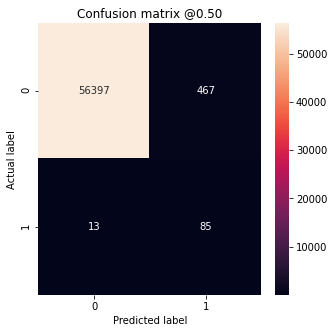

In [ ]:
metrics_over_random_baseline=meterics(model_baseline_over_random)

affichage des résultats pour le modèle elaboré avec random oversampling:

loss :  0.05602455139160156
tp :  76.0
fp :  29.0
tn :  56835.0
fn :  22.0
accuracy :  0.9991046786308289
precision :  0.723809540271759
recall :  0.7755101919174194
auc :  0.8926514983177185

Legitimate Transactions Detected (True Negatives):  56835
Legitimate Transactions Incorrectly Detected (False Positives):  29
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  98


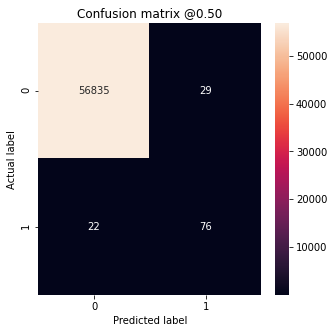

In [ ]:
metrics_over_random_elab=meterics(model_elab_over_random)

Utilisation de l'approche SMOTE d'oversampling avec le package imblearn

In [ ]:
# APPLY THE SMOTE STRATEGY FOR OVERSAMPLING:

from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.5)

train_features_over, train_labels_over = oversample.fit_resample(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainemnt des modèles baseline et elaboré:

In [ ]:
model_elab_over_SMOTE = train_model_elab(train_features_over,train_labels_over)

model_baseline_over_SMOTE = train_model_baseline(train_features_over,train_labels_over)

Epoch 1/300
134/134 [==============================] - 5s 21ms/step - loss: 0.5531 - tp: 13143.1630 - fp: 2035.5111 - tn: 147639.8593 - fn: 33369.9407 - accuracy: 0.8257 - precision: 0.7005 - recall: 0.2284 - auc: 0.8849 - val_loss: 0.0497 - val_tp: 59.0000 - val_fp: 880.0000 - val_tn: 44622.0000 - val_fn: 8.0000 - val_accuracy: 0.9805 - val_precision: 0.0628 - val_recall: 0.8806 - val_auc: 0.9743
Epoch 2/300
134/134 [==============================] - 2s 12ms/step - loss: 0.0981 - tp: 43869.4593 - fp: 1899.0296 - tn: 90889.2222 - fn: 2568.7630 - accuracy: 0.9657 - precision: 0.9558 - recall: 0.9408 - auc: 0.9927 - val_loss: 0.0304 - val_tp: 59.0000 - val_fp: 529.0000 - val_tn: 44973.0000 - val_fn: 8.0000 - val_accuracy: 0.9882 - val_precision: 0.1003 - val_recall: 0.8806 - val_auc: 0.9596
Epoch 3/300
134/134 [==============================] - 2s 12ms/step - loss: 0.0540 - tp: 45069.7481 - fp: 1284.8074 - tn: 91625.8963 - fn: 1246.0222 - accuracy: 0.9811 - precision: 0.9715 - recall: 0.

affichage des résultats pour le modèle baseline avec SMOTE oversampling:

loss :  0.04510163515806198
tp :  76.0
fp :  37.0
tn :  56827.0
fn :  22.0
accuracy :  0.998964250087738
precision :  0.6725663542747498
recall :  0.7755101919174194
auc :  0.8874994516372681

Legitimate Transactions Detected (True Negatives):  56827
Legitimate Transactions Incorrectly Detected (False Positives):  37
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  98


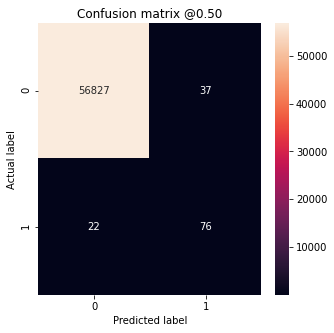

In [ ]:
metrics_over_SMOTE_elab=meterics(model_elab_over_SMOTE)

affichage des résultats pour le modèle elaboré avec SMOTE oversampling:

loss :  0.02423790842294693
tp :  82.0
fp :  354.0
tn :  56510.0
fn :  16.0
accuracy :  0.9935044646263123
precision :  0.18807339668273926
recall :  0.8367347121238708
auc :  0.9570361375808716

Legitimate Transactions Detected (True Negatives):  56510
Legitimate Transactions Incorrectly Detected (False Positives):  354
Fraudulent Transactions Missed (False Negatives):  16
Fraudulent Transactions Detected (True Positives):  82
Total Fraudulent Transactions:  98


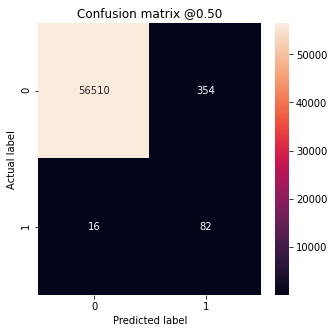

In [ ]:
metrics_over_SMOTE_baseline=meterics(model_baseline_over_SMOTE)

Utiliser l'approche ADASYN d'oversampling avec le package imblearn:

In [ ]:
# APPLY THE ADASYN STRATEGY FOR OVERSAMPLING:

from imblearn.over_sampling import ADASYN

oversample = ADASYN(sampling_strategy=0.5)

train_features_over, train_labels_over = oversample.fit_resample(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des deux modèles baseline et elaboré:

In [ ]:
model_elab_over_ADASYN = train_model_elab(train_features_over,train_labels_over)

model_baseline_over_ADASYN = train_model_baseline(train_features_over,train_labels_over)

Epoch 1/300
134/134 [==============================] - 4s 19ms/step - loss: 0.5854 - tp: 8451.6519 - fp: 2759.3407 - tn: 147080.1333 - fn: 37896.9630 - accuracy: 0.8052 - precision: 0.5909 - recall: 0.1574 - auc: 0.8419 - val_loss: 0.1214 - val_tp: 60.0000 - val_fp: 2683.0000 - val_tn: 42819.0000 - val_fn: 7.0000 - val_accuracy: 0.9410 - val_precision: 0.0219 - val_recall: 0.8955 - val_auc: 0.9666
Epoch 2/300
134/134 [==============================] - 2s 15ms/step - loss: 0.1477 - tp: 44339.1926 - fp: 4202.8222 - tn: 88521.3259 - fn: 2162.7481 - accuracy: 0.9495 - precision: 0.9062 - recall: 0.9471 - auc: 0.9826 - val_loss: 0.0608 - val_tp: 60.0000 - val_fp: 1095.0000 - val_tn: 44407.0000 - val_fn: 7.0000 - val_accuracy: 0.9758 - val_precision: 0.0519 - val_recall: 0.8955 - val_auc: 0.9485
Epoch 3/300
134/134 [==============================] - 2s 12ms/step - loss: 0.0615 - tp: 45986.9185 - fp: 1973.7556 - tn: 90783.0074 - fn: 482.4074 - accuracy: 0.9811 - precision: 0.9564 - recall: 0.

affichage des résultats pour le modèle baseline avec ADASYN oversampling:

loss :  0.05216551944613457
tp :  79.0
fp :  46.0
tn :  56818.0
fn :  19.0
accuracy :  0.9988588690757751
precision :  0.6320000290870667
recall :  0.8061224222183228
auc :  0.9027184247970581

Legitimate Transactions Detected (True Negatives):  56818
Legitimate Transactions Incorrectly Detected (False Positives):  46
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  79
Total Fraudulent Transactions:  98


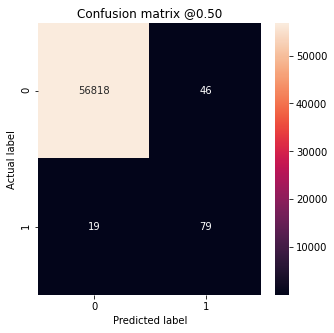

In [ ]:
metrics_over_ADASYN_elab=meterics(model_elab_over_ADASYN)

affichage des résultats pour le modèle elaboré avec ADASYN oversampling:

loss :  0.04176803305745125
tp :  84.0
fp :  966.0
tn :  55898.0
fn :  14.0
accuracy :  0.9827955365180969
precision :  0.07999999821186066
recall :  0.8571428656578064
auc :  0.9483887553215027

Legitimate Transactions Detected (True Negatives):  55898
Legitimate Transactions Incorrectly Detected (False Positives):  966
Fraudulent Transactions Missed (False Negatives):  14
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  98


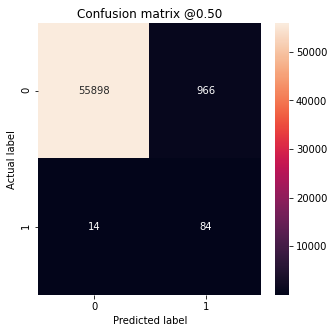

In [ ]:
metrics_over_ADASYN_baseline=meterics(model_baseline_over_ADASYN)

En appliquant trois techniques de oversampling, on remarque que les résultats sont plutôt proches avec une légère différence surtout au niveau des opérations des fraudes détectées. Par contre on remarque qu'au niveau de la détection, le modèle élaboré est moins performant que le modèle baseline, mais, il ya une large différence entre les opérations détectées comme fraude alors qu'elles ne le sont pas.


On peut voir en termes des résultats que l'application de Random Undersampling donne la meilleure performance pour nos modèles, puis l'application de SMOTE et finalement ADASYN.


On peut conclure à la fin, que le modèle élaboré est plus performant et efficace, car il permet de détecter autant des fraudes que le modèle baseline, avec beaucoup moins de détection d'opération normale comme fraude. Par exemple, dans le cas de Random OverSampling, on a 49 cas où le modèle élaboré s'est trompé, contre 507 pour le modèle baseline.




#5. Entrainement avec undersampling

Appliquer l'approche Random d'undersampling avec le package imblearn:

In [ ]:
# Apply Random Undersampling strategy for undersampling:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)

train_features_under, train_labels_under = oversample.fit_resample(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des modèles elaboré et baseline:

In [ ]:
model_elab_under_random = train_model_elab(train_features_under,train_labels_under)

model_baseline_under_random = train_model_baseline(train_features_under,train_labels_under)

Epoch 1/300
134/134 [==============================] - 5s 19ms/step - loss: 0.5854 - tp: 8453.6519 - fp: 3371.3407 - tn: 146468.1333 - fn: 37894.9630 - accuracy: 0.8013 - precision: 0.5423 - recall: 0.1575 - auc: 0.8370 - val_loss: 0.1214 - val_tp: 60.0000 - val_fp: 2683.0000 - val_tn: 42819.0000 - val_fn: 7.0000 - val_accuracy: 0.9410 - val_precision: 0.0219 - val_recall: 0.8955 - val_auc: 0.9666
Epoch 2/300
134/134 [==============================] - 2s 12ms/step - loss: 0.1477 - tp: 44339.1926 - fp: 4202.8222 - tn: 88521.3259 - fn: 2162.7481 - accuracy: 0.9495 - precision: 0.9062 - recall: 0.9471 - auc: 0.9826 - val_loss: 0.0608 - val_tp: 60.0000 - val_fp: 1095.0000 - val_tn: 44407.0000 - val_fn: 7.0000 - val_accuracy: 0.9758 - val_precision: 0.0519 - val_recall: 0.8955 - val_auc: 0.9485
Epoch 3/300
134/134 [==============================] - 2s 12ms/step - loss: 0.0615 - tp: 45986.9185 - fp: 1973.7556 - tn: 90783.0074 - fn: 482.4074 - accuracy: 0.9811 - precision: 0.9564 - recall: 0.

affichage des résultats pour le modèle baseline avec Random undersampling:

loss :  0.05216551944613457
tp :  79.0
fp :  46.0
tn :  56818.0
fn :  19.0
accuracy :  0.9988588690757751
precision :  0.6320000290870667
recall :  0.8061224222183228
auc :  0.9027184247970581

Legitimate Transactions Detected (True Negatives):  56818
Legitimate Transactions Incorrectly Detected (False Positives):  46
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  79
Total Fraudulent Transactions:  98


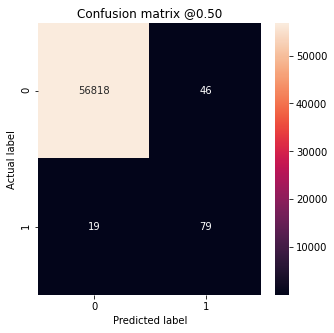

In [ ]:
metrics_under_random_elab=meterics(model_elab_under_random)

affichage des résultats pour le modèle elaboré avec Random undersampling:

loss :  0.04176803305745125
tp :  84.0
fp :  966.0
tn :  55898.0
fn :  14.0
accuracy :  0.9827955365180969
precision :  0.07999999821186066
recall :  0.8571428656578064
auc :  0.9483887553215027

Legitimate Transactions Detected (True Negatives):  55898
Legitimate Transactions Incorrectly Detected (False Positives):  966
Fraudulent Transactions Missed (False Negatives):  14
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  98


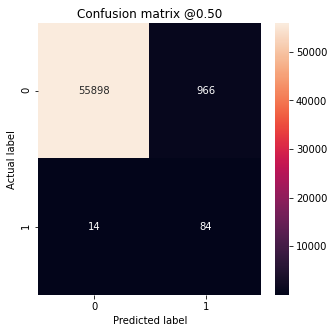

In [ ]:
metrics_under_random_baseline=meterics(model_baseline_under_random)

Application de l'approche TomekLinks d'undersampling:

In [ ]:
# Apply Random Undersampling strategy for undersampling:
from imblearn.under_sampling import TomekLinks

undersample = TomekLinks(sampling_strategy='auto')

train_features_under, train_labels_under = undersample.fit_resample(train_features, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des deux modèles baseline et elaboré:

In [ ]:
model_elab_under_TomekLinks = train_model_elab(train_features_under,train_labels_under)

model_baseline_under_TomekLinks = train_model_baseline(train_features_under,train_labels_under)

Epoch 1/300
89/89 [==============================] - 4s 23ms/step - loss: 0.5078 - tp: 91.8444 - fp: 3337.2111 - tn: 146522.5667 - fn: 171.3556 - accuracy: 0.9734 - precision: 0.0269 - recall: 0.4130 - auc: 0.7910 - val_loss: 0.0132 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45502.0000 - val_fn: 67.0000 - val_accuracy: 0.9985 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8970
Epoch 2/300
89/89 [==============================] - 1s 13ms/step - loss: 0.0152 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 92990.9556 - fn: 170.0222 - accuracy: 0.9982 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7647 - val_loss: 0.0069 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45502.0000 - val_fn: 67.0000 - val_accuracy: 0.9985 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8928
Epoch 3/300
89/89 [==============================] - 1s 13ms/step - loss: 0.0095 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 92996.2444 - fn: 164.7333 - accuracy: 0.9982 - preci

affichage des résultats pour le modèle baseline avec TomekLinks undersampling:

loss :  0.003975182306021452
tp :  71.0
fp :  12.0
tn :  56852.0
fn :  27.0
accuracy :  0.9993153214454651
precision :  0.8554216623306274
recall :  0.7244898080825806
auc :  0.9124699234962463

Legitimate Transactions Detected (True Negatives):  56852
Legitimate Transactions Incorrectly Detected (False Positives):  12
Fraudulent Transactions Missed (False Negatives):  27
Fraudulent Transactions Detected (True Positives):  71
Total Fraudulent Transactions:  98


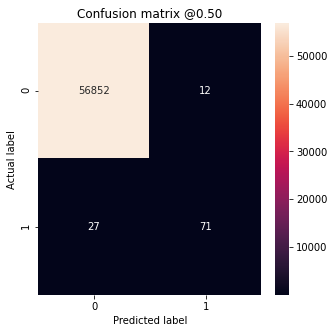

In [ ]:
metrics_under_TomekLinks_baseline=meterics(model_baseline_under_TomekLinks)

affichage des résultats pour le modèle elaboré avec TomekLinks undersampling:

loss :  0.00519163254648447
tp :  76.0
fp :  16.0
tn :  56848.0
fn :  22.0
accuracy :  0.9993329048156738
precision :  0.8260869383811951
recall :  0.7755101919174194
auc :  0.9126824140548706

Legitimate Transactions Detected (True Negatives):  56848
Legitimate Transactions Incorrectly Detected (False Positives):  16
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  98


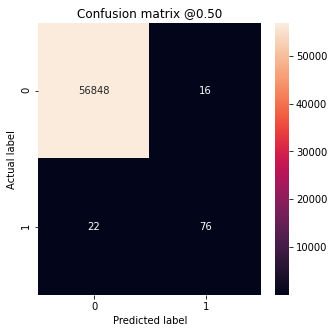

In [ ]:
metrics_under_TomekLinks_elab=meterics(model_elab_under_TomekLinks)

Concernant l'UnderSampling, on peux remarquer que la méthode TomekLinks est beaucoup plus performante en terme des résultats que Random UnderSampling, et voir même le meilleure comparant les autres approaches déja vu, ou elle permet une détection élevé des opération de fraudes, avec très peu d'erreurs concernant les opérations normals.

On peut voir également que le modèle élaboré est beaucoup mieux que le modèle baseline, car il permet de détecter plus des opérations de fraudes, avec très peu de différence sur les erreurs ( 2 opérations uniquement)


#6.Entrainement avec une approche hybrid de resampling

Application d'approche hybrid qui combine les approche Random d'oversampling et TomekLinks d'undersampling:

In [ ]:
over_sampler_step = RandomOverSampler(sampling_strategy=0.5)
over_features,over_labels = over_sampler_step.fit_resample(train_features,train_labels)
under_sampler_step = TomekLinks()
hybrid_features,hybrid_labels = under_sampler_step.fit_resample(over_features,over_labels)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des modèles baseline et elaboré:

In [ ]:
model_elab_hybrid_1 = train_model_elab(hybrid_features,hybrid_labels)

model_baseline_hubrid_1 = train_model_baseline(hybrid_features,hybrid_labels)

Epoch 1/300
134/134 [==============================] - 5s 19ms/step - loss: 0.5555 - tp: 13065.8593 - fp: 2063.0815 - tn: 147612.2889 - fn: 33447.2444 - accuracy: 0.8253 - precision: 0.6972 - recall: 0.2259 - auc: 0.8825 - val_loss: 0.0621 - val_tp: 59.0000 - val_fp: 1113.0000 - val_tn: 44389.0000 - val_fn: 8.0000 - val_accuracy: 0.9754 - val_precision: 0.0503 - val_recall: 0.8806 - val_auc: 0.9744
Epoch 2/300
134/134 [==============================] - 2s 12ms/step - loss: 0.1145 - tp: 43110.9778 - fp: 2164.1037 - tn: 90624.1481 - fn: 3327.2444 - accuracy: 0.9583 - precision: 0.9490 - recall: 0.9249 - auc: 0.9895 - val_loss: 0.0389 - val_tp: 59.0000 - val_fp: 693.0000 - val_tn: 44809.0000 - val_fn: 8.0000 - val_accuracy: 0.9846 - val_precision: 0.0785 - val_recall: 0.8806 - val_auc: 0.9567
Epoch 3/300
134/134 [==============================] - 2s 12ms/step - loss: 0.0614 - tp: 44713.2222 - fp: 1601.6667 - tn: 91309.0370 - fn: 1602.5481 - accuracy: 0.9761 - precision: 0.9647 - recall: 0

affichage des résultats pour le modèle baseline avec hybrid Random OverSampling et TomekLinks UnderSampling:

loss :  0.029180968180298805
tp :  85.0
fp :  467.0
tn :  56397.0
fn :  13.0
accuracy :  0.9915733337402344
precision :  0.15398550033569336
recall :  0.8673469424247742
auc :  0.9558987617492676

Legitimate Transactions Detected (True Negatives):  56397
Legitimate Transactions Incorrectly Detected (False Positives):  467
Fraudulent Transactions Missed (False Negatives):  13
Fraudulent Transactions Detected (True Positives):  85
Total Fraudulent Transactions:  98


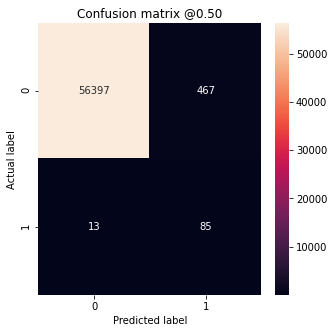

In [ ]:
metrics_hybrid1_baseline=meterics(model_baseline_hubrid_1)

affichage des résultats pour le modèle elaboré avec hybrid Random OverSampling et TomekLinks UnderSampling:

loss :  0.05602455139160156
tp :  76.0
fp :  29.0
tn :  56835.0
fn :  22.0
accuracy :  0.9991046786308289
precision :  0.723809540271759
recall :  0.7755101919174194
auc :  0.8926514983177185

Legitimate Transactions Detected (True Negatives):  56835
Legitimate Transactions Incorrectly Detected (False Positives):  29
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  98


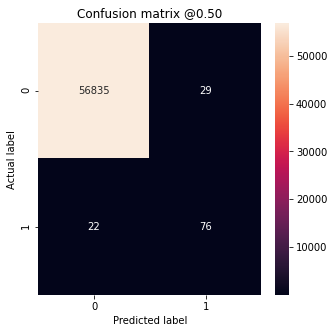

In [ ]:
metrics_hybrid1_elab=meterics(model_elab_hybrid_1)

Application d'une approche hybrid en combinant l'approche SMOTE oversampling et TomekLinks Undersanmling:

In [ ]:
over_sampler_step = SMOTE(sampling_strategy=0.5)
over_features,over_labels = over_sampler_step.fit_resample(train_features,train_labels)
under_sampler_step = TomekLinks()
hybrid_features,hybrid_labels = under_sampler_step.fit_resample(over_features,over_labels)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Entrainement des deux modèles baseline et elaboré:

In [ ]:
model_elab_hybrid_2 = train_model_elab(hybrid_features,hybrid_labels)

model_baseline_hubrid_2 = train_model_baseline(hybrid_features,hybrid_labels)

Epoch 1/300
134/134 [==============================] - 4s 19ms/step - loss: 0.5531 - tp: 13143.1630 - fp: 2035.5111 - tn: 147639.8593 - fn: 33369.9407 - accuracy: 0.8257 - precision: 0.7005 - recall: 0.2284 - auc: 0.8849 - val_loss: 0.0497 - val_tp: 59.0000 - val_fp: 880.0000 - val_tn: 44622.0000 - val_fn: 8.0000 - val_accuracy: 0.9805 - val_precision: 0.0628 - val_recall: 0.8806 - val_auc: 0.9743
Epoch 2/300
134/134 [==============================] - 2s 17ms/step - loss: 0.0981 - tp: 43869.4593 - fp: 1899.0296 - tn: 90889.2222 - fn: 2568.7630 - accuracy: 0.9657 - precision: 0.9558 - recall: 0.9408 - auc: 0.9927 - val_loss: 0.0304 - val_tp: 59.0000 - val_fp: 529.0000 - val_tn: 44973.0000 - val_fn: 8.0000 - val_accuracy: 0.9882 - val_precision: 0.1003 - val_recall: 0.8806 - val_auc: 0.9596
Epoch 3/300
134/134 [==============================] - 2s 12ms/step - loss: 0.0540 - tp: 45069.7481 - fp: 1284.8074 - tn: 91625.8963 - fn: 1246.0222 - accuracy: 0.9811 - precision: 0.9715 - recall: 0.

affichage des résultats pour le modèle baseline avec hybrid SMOTE OverSampling et TomekLinks UnderSampling:

loss :  0.02423790842294693
tp :  82.0
fp :  354.0
tn :  56510.0
fn :  16.0
accuracy :  0.9935044646263123
precision :  0.18807339668273926
recall :  0.8367347121238708
auc :  0.9570361375808716

Legitimate Transactions Detected (True Negatives):  56510
Legitimate Transactions Incorrectly Detected (False Positives):  354
Fraudulent Transactions Missed (False Negatives):  16
Fraudulent Transactions Detected (True Positives):  82
Total Fraudulent Transactions:  98


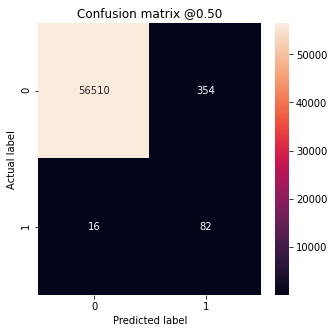

In [ ]:
metrics_hybrid2_baseline=meterics(model_baseline_hubrid_2)

affichage des résultats pour le modèle elaboré avec hybrid SMOTE OverSampling et TomekLinks UnderSampling:

loss :  0.04510163515806198
tp :  76.0
fp :  37.0
tn :  56827.0
fn :  22.0
accuracy :  0.998964250087738
precision :  0.6725663542747498
recall :  0.7755101919174194
auc :  0.8874994516372681

Legitimate Transactions Detected (True Negatives):  56827
Legitimate Transactions Incorrectly Detected (False Positives):  37
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  98


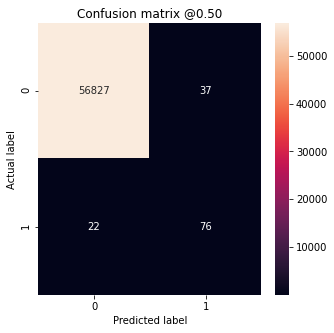

In [ ]:
metrics_hybrid2_elab=meterics(model_elab_hybrid_2)

Concernant le mélange des approches de oversampling et undersampling, on peux remarquer qu'on a une très bonne, voir la meilleure detection de fraude, avec un nombre très négligable d'erreurs sur les opérations normals pour le modèle elaboré, ou en combinant TomekLinks avec SMOTE, on a pu avoir 87 detection sur 100, et uniquement 63 erreurs sur 56564 bonne detection des opérations normal. On peux remarquer que le modèle baseline a pu detecter 92 opération sur 100 mais, avec un taux plus elevé ( 361 ) pour les erreurs d'opérations normales.


#7. Conclusions générales

Création d'un data frame avec les metrics de chaque approche et modèle:

In [ ]:
# Créer un dictionnaire de l'ensemble des résultats
list_res = [metrics_simple_baseline,
metrics_weighted_baseline,
metrics_over_random_baseline,
metrics_over_SMOTE_baseline,
metrics_over_ADASYN_baseline,
metrics_under_random_baseline,
metrics_under_TomekLinks_baseline,
metrics_hybrid1_baseline,
metrics_hybrid2_baseline,
metrics_simple_elab,
metrics_weighted_elab,
metrics_over_random_elab,
metrics_over_SMOTE_elab,
metrics_over_ADASYN_elab,
metrics_under_random_elab,
metrics_under_TomekLinks_elab, 
metrics_hybrid1_elab,
metrics_hybrid2_elab]
dict_res = {}
for i, res in enumerate(list_res):
  dict_res[i] = res


In [ ]:
df_res = pd.DataFrame.from_dict(dict_res,orient='index')
df_res.insert(0,'modele',['baseline','baseline','baseline','baseline','baseline','baseline','baseline','baseline','baseline','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré','modèle_élaboré'])
df_res.insert(1,'methode',['simple','ponderation_class','random_oversampling','smote','adasyn','random_undersampling','tomek_links','random_over_tomeklinks','smote_tomeklinks']*2)

La fonction responsable de l'affichage des réulstats:

In [ ]:
def plot_results(metric):
  ax = sns.barplot(x="modele", y=str(metric), hue="methode", data=df_res)
  ax.set_xlabel('Modèle',fontsize = 15)
  ax.set_ylabel(metric.capitalize(), fontsize = 15)
  ax.tick_params(labelsize=15)

  # Put the legend out of the figure
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
  plt.title(metric.capitalize())
  plt.show()

L'affichage des résultats de comparaison des AUC

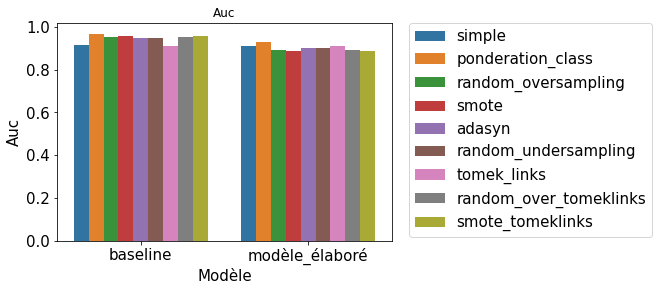

In [ ]:
# AUC
plot_results('auc')

L'afficahge des résultats de comparaison de recall

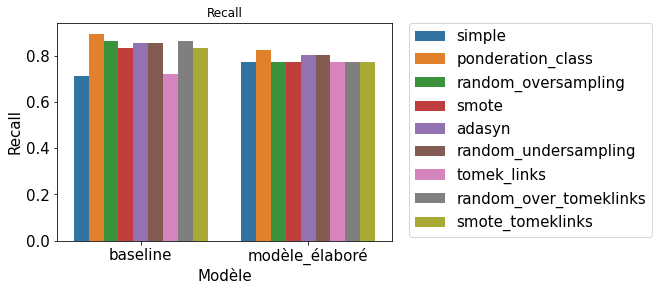

In [ ]:
# recall
plot_results('recall')

L'afficahge des résultats de comparaison de precision

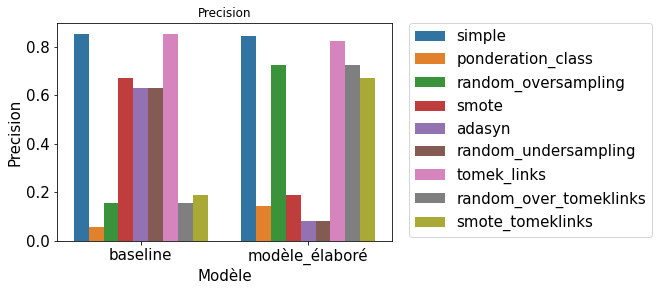

In [ ]:
# precision
plot_results('precision')

L'afficahge des résultats de comparaison de accuracy

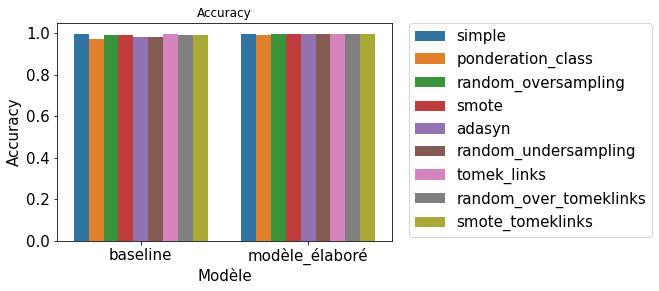

In [ ]:
# accuracy
plot_results('accuracy')

Dans le domaine des banques, la détection des fraudes est très importante, ou il est préférable de détecter une opération normale comme fraude que de ne pas détecter une fraude, mais, le taux d'erreurs doit être raisonnable, sinon, ça sera comme si on détecte toutes les opérations comme une fraude.

Pour cela, et selon le besoin, on peut choisir une technique, et un modèle à appliquer, le modèle baseline a prouvé qu'il est capable de détecter le plus des opérations de fraudes, par contre, avec beaucoup plus d'erreurs de détection sur les opérations normales. Par contre, le modèle élaboré, lui, est plus capable d'être juste dans les deux cas, avec une légère différence en termes de détection, et une différence énorme dans le taux d'erreur pour les opérations normales ( plus performant ).

Concernant les méthodes, on a pu voir que la pondération des classes peut être intéressante, mais comme le fait le modèle baseline, son taux d'erreurs est plus élevé lors des opérations normales.
Une application de oversampling peut être intéressante, et la meilleure méthode avec les modèles qu'on a testé c'est bien le Random OverSampling, mais parfois, d'autres méthodes sont plus performantes.

La meilleure méthode concernant le UnderSampling c'est bien la méthode TomekLinks, c'est une méthode très intéressante en termes de résultats, surtout avec le modèle élaboré.

Pour finir, la meilleure approche, c'est bien d'utiliser un mélange des approches undersampling et oversampling, ou comme on l'a appelé, une approche hybrid de resampling, cette méthode a prouvé qu'elle a les meilleurs résultats, en terme de détection, et en terme de moins d'erreur.
